In [2]:
#Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV




In [3]:
# Cargar los datos desde el archivo Excel
file_path = "C:/Users/gonza/OneDrive/Desktop/machine learning/house_data.xlsx"
df = pd.read_excel(file_path)

# Mostrar las primeras filas para revisión
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Información general sobre el dataset
df.info()

# Resumen estadístico
df.describe()

# Verificar valores nulos
df.isnull().sum()

# Verificar duplicados
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

0

In [5]:
# Eliminar duplicados
df = df.drop_duplicates()

# Imputar valores nulos (si hay) con la media o eliminar si es demasiado significativo
df = df.dropna()  # Alternativamente, df.fillna(df.mean(), inplace=True)

# Confirmar que se eliminaron los valores nulos
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#verifico el tipo de datos 
print(df.dtypes)


id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

In [8]:
# Verificar valores nulos
print(numeric_df.isnull().sum())

# Opciones para manejar nulos:
numeric_df = numeric_df.dropna()  # Eliminar filas con valores nulos
# Alternativamente:
# numeric_df = numeric_df.fillna(numeric_df.mean())  # Imputar con la media


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


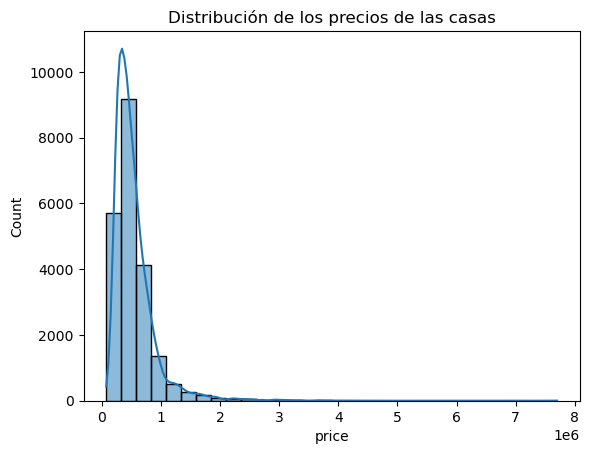

In [9]:
# Visualizar la distribución de precios
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Distribución de los precios de las casas")
plt.show()

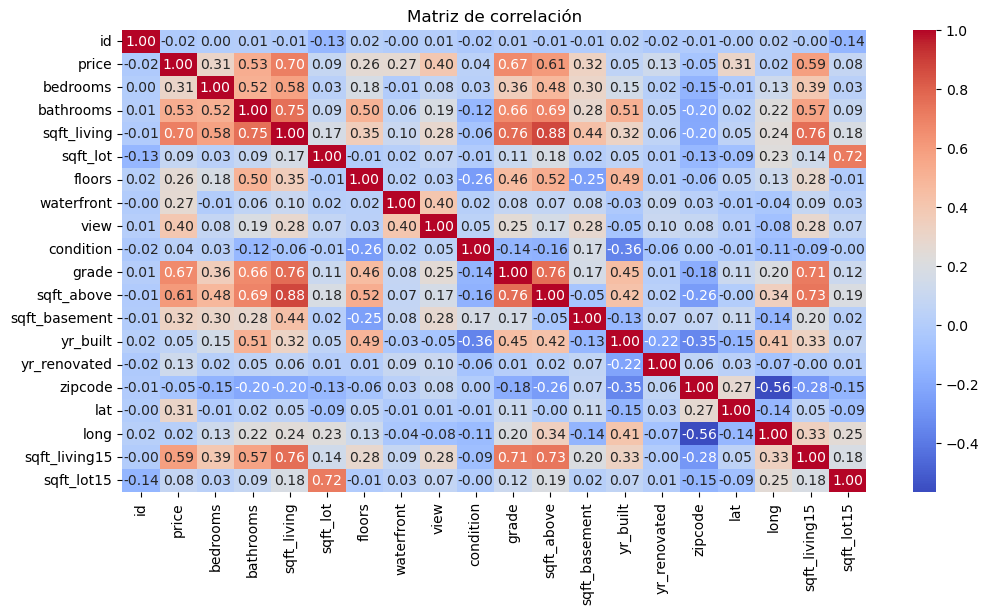

In [10]:
# Matriz de correlación y heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


In [11]:
print(numeric_df.columns)


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [12]:
# Calcular la correlación con el precio
correlation = numeric_df.corr()["price"].sort_values(ascending=False)
print(correlation)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [14]:
#División de datos en entrenamiento y prueba,seleccionar variables predictoras y objetivo 
X = df.drop(columns=["price"])
y = df["price"]

In [15]:
# Dividir en train (67%) y test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
# Confirmar dimensiones
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14480, 20), (7133, 20), (14480,), (7133,))

In [17]:
print(X_train.dtypes)  # Verifica que todas las columnas sean numéricas
print(X_train.isnull().sum())  # Verifica si hay valores nulos
print(X_train.shape)  # Verifica el tamaño del conjunto de datos


id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
(14480, 20)


In [18]:
# Eliminar columnas no numéricas, como 'date'
X_train = X_train.drop(columns=["date"], errors="ignore")
X_test = X_test.drop(columns=["date"], errors="ignore")

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
Lasso(max_iter=10000)
ElasticNet(max_iter=10000)


ElasticNet(max_iter=10000)

In [20]:
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
elastic_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}


In [21]:
Lasso(max_iter=10000, tol=0.01)
ElasticNet(max_iter=10000, tol=0.01)


ElasticNet(max_iter=10000, tol=0.01)

In [22]:
ridge_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}


In [23]:
print("X_train_scaled definido:", 'X_train_scaled' in locals())


X_train_scaled definido: True


In [24]:
print("Dimensiones de X_train_scaled:", X_train_scaled.shape)
print("Dimensiones de X_test_scaled:", X_test_scaled.shape)


Dimensiones de X_train_scaled: (14480, 19)
Dimensiones de X_test_scaled: (7133, 19)


In [25]:
tree_params = {
    'max_depth': [None, 10, 20, 30],           # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],           # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4]              # Número mínimo de muestras en una hoja
}


In [26]:
from sklearn.model_selection import RandomizedSearchCV


In [27]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Parámetros de hiperparámetros
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
ridge_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
elastic_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]}
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Total de combinaciones (opcional, para ajustar n_iter)
lasso_combinations = len(lasso_params['alpha'])
ridge_combinations = len(ridge_params['alpha'])
elastic_combinations = len(elastic_params['alpha']) * len(elastic_params['l1_ratio'])
tree_combinations = len(tree_params['max_depth']) * len(tree_params['min_samples_split']) * len(tree_params['min_samples_leaf'])

# Modelos con RandomizedSearchCV
models = {
    "Lasso": RandomizedSearchCV(Lasso(max_iter=10000, tol=0.01), lasso_params, cv=5, n_iter=lasso_combinations, random_state=42, n_jobs=-1),
    "Ridge": RandomizedSearchCV(Ridge(), ridge_params, cv=5, n_iter=ridge_combinations, random_state=42, n_jobs=-1),
    "ElasticNet": RandomizedSearchCV(ElasticNet(max_iter=10000, tol=0.01), elastic_params, cv=5, n_iter=elastic_combinations, random_state=42, n_jobs=-1),
    "DecisionTree": RandomizedSearchCV(DecisionTreeRegressor(), tree_params, cv=5, n_iter=tree_combinations, random_state=42, n_jobs=-1)
}


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Crear un diccionario para guardar los resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenar el modelo con el conjunto de entrenamiento escalado
    model.fit(X_train_scaled, y_train)
    
    # Obtener el mejor modelo y realizar predicciones
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    # Calcular las métricas de evaluación
    results[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "Best Params": model.best_params_
    }

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results).T

# Mostrar el DataFrame en el notebook
print("Cuadro Comparativo de Modelos:")
display(results_df)

# Mostrar las métricas principales
print("Métricas principales (MSE, MAE, R²):")
display(results_df[["MSE", "MAE", "R²"]])

Cuadro Comparativo de Modelos:


,MSE,MAE,R²,Best Params
Lasso,45418800748.60183,126881.409717,0.696665,{'alpha': 0.1}
Ridge,45423285622.471535,126860.452443,0.696635,{'alpha': 10}
ElasticNet,45452408107.789757,126733.045636,0.69644,"{'l1_ratio': 0.5, 'alpha': 0.01}"
DecisionTree,29716885647.577862,91919.602077,0.801532,"{'min_samples_split': 10, 'min_samples_leaf': ..."


Métricas principales (MSE, MAE, R²):


,MSE,MAE,R²
Lasso,45418800748.60183,126881.409717,0.696665
Ridge,45423285622.471535,126860.452443,0.696635
ElasticNet,45452408107.789757,126733.045636,0.69644
DecisionTree,29716885647.577862,91919.602077,0.801532


In [ ]:
#concluciones de los resultados obtenidos 
-Comparación de Modelos:
Árbol de Decisión (DecisionTree) obtuvo el mejor desempeño general según las métricas de evaluación. Este modelo tiene el MSE más bajo (297,168,564.77), el MAE más bajo (91,919.60) y el R² más alto (0.801532), indicando que es el modelo que mejor explica la varianza en los datos y produce errores más bajos.
Los modelos lineales (Lasso, Ridge, y ElasticNet) presentan un desempeño similar, con valores de MSE, MAE y R² muy cercanos. Estos modelos tienen un R² ≈ 0.696, lo que significa que explican el 69.6% de la varianza en los datos, pero son superados por el Árbol de Decisión.
-Hiperparámetros Óptimos:
Los hiperparámetros seleccionados por los modelos lineales (como alpha en Lasso y Ridge) son relativamente pequeños, indicando que el regularizador tiene un efecto limitado.
El Árbol de Decisión optimizó parámetros como min_samples_split y min_samples_leaf, lo que sugiere que un ajuste cuidadoso de estos parámetros contribuyó a su mejor rendimiento.
-Rendimiento y Simplicidad:
Aunque el Árbol de Decisión ofrece el mejor desempeño, su complejidad puede ser mayor que la de los modelos lineales, especialmente para datos grandes o en aplicaciones donde la interpretabilidad es clave.
Los modelos lineales son más simples y rápidos de entrenar, lo que podría ser una ventaja en escenarios donde la precisión extrema no sea el único objetivo.